# Part I - Communicate Data Findings - FordGoBike System Data

## by Maurício de Assis Domingues

## Introduction

This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area.
The Bike Share for All Trip bike-sharing system was launched by Ford GoBike in the San Francisco Bay Area in 2017 in partnership with the Metropolitan Transportation Commission and Bay Area Bike Share. The program's goal is to provide equitable access to shared bikes for all people, regardless of their income, ethnic background or physical disabilities.

The program offers electric and conventional bikes at more than 500 stations in San Francisco, Oakland, Berkeley, Emeryville and San Jose, with more than 7,000 bikes available for rent. The bikeshare system is operated by Lyft Bikes and Scooters, which acquired Ford GoBike in 2019.

Bike Share for All Trip users can choose from several subscription options, including day pass, monthly pass and annual pass, with prices varying depending on the option chosen. Users eligible for the Bike Share for All Trip program, including those receiving government assistance, can apply for an annual pass for a reduced fee.

The bike-sharing system collects data on bike usage, including trip times, origin and destination stations, and distance travelled. This data is used to improve the bike sharing system and inform public policies related to urban mobility. Data is also made publicly available for research and analysis purposes.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Remove rows without gender value
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [10]:
df_clean['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df_clean['user_type'].value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [12]:
df_clean = df_clean[df_clean['start_station_id']. isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [13]:
df_clean.duplicated().sum()

0

In [14]:
# Convert start_time to datetime

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [16]:
# Separate day of week

df_clean['start_time_dayofweek'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour
# Convert start_time_dayofweek to ordinal variables
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [17]:
df_clean['start_time_dayofweek'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_dayofweek, dtype: int64

In [18]:
# Calculate member_age from member_birth_year.
df_clean['member_age'] = 2023 - df_clean['member_birth_year']

In [19]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [20]:
# Turn seconds into minutes to make information easier to understand
df_clean['duration_min'] = df_clean['duration_sec']/60

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_dayofweek       174952 non-null category
start_time_hour   

In [22]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,39,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,51,1030.90


In [23]:
df_clean.shape

(174952, 20)

### What is the structure of your dataset?

The dataset has after wrangling 174952 rows and 20 columns:
duration_sec, start_time, end_time, start_station_id, start_staion_name, startr_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_time_dayofweek, start_time_hour, member_age and duration_min.
### What is/are the main feature(s) of interest in your dataset?

I am interested in collecting information related to travel time and the relationship with gender, age, customer or subsscriber.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe that the necessary information will be in 'duration_min', 'member_age', 'member_gender', 'user_type', 'start_time' and end_time'.

## Univariate Exploration

I'll start by looking at the distribution of one of the main variables of interest: trip duration (duration_min).

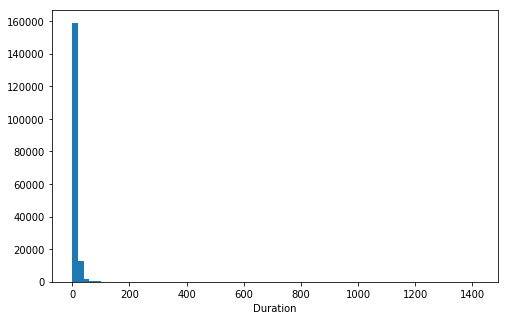

In [24]:
# Start with a default scale chart
binsize = 20
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlabel('Duration')
plt.show()

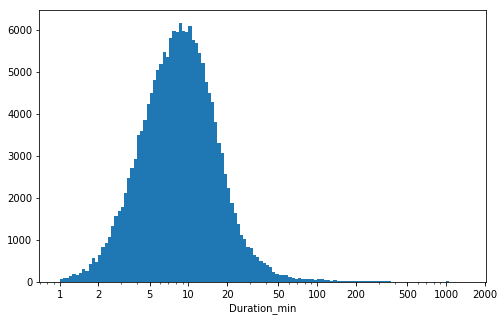

In [25]:
# There is a long tail in the distribution, so let's put it on a logarithmic scale.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])

plt.xlabel('Duration_min')
plt.show()

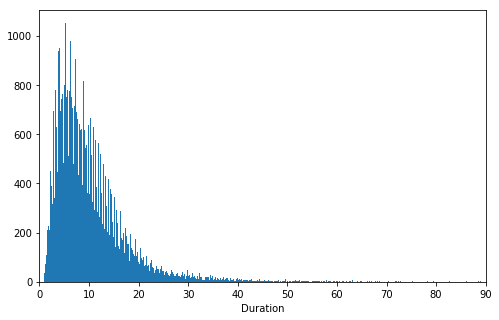

In [26]:

binsize = 0.05
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,3.5])
plt.xticks(range(0,100, 10))
plt.xlabel('Duration')
plt.show()

Duration of trip 'min_duration' has a long tail distribution, with lots of data on the left end and little data on the end of a longer duration. When plotted on a logarithmic scale, the distribution appears unimodal, with a peak near 10 minutes. The distribution remains uniform both in the increase between 3 to 4 minutes and in the decrease of time between 15 and 20 minutes.

The distribution looks normal throughout the analysis, I performed the division of the 'duration_sec' column by 60 to create the 'duration_min' column to improve the understanding of the collected information.

Checking which day of the week has the most users.

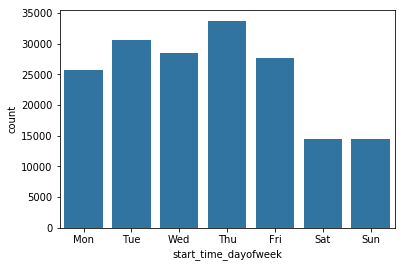

In [28]:
bluesteel = sb.color_palette()[0]
sb.countplot(data = df_clean, x='start_time_dayofweek', color = bluesteel)

Interestingly, Thursday is the day that registers the most users.

Now checking the period (s) of the day that have more users.

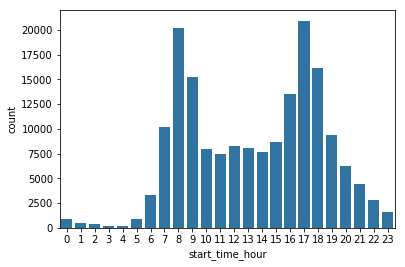

In [33]:
p1 = sb.countplot(data = df_clean, x = 'start_time_hour', color = bluesteel)

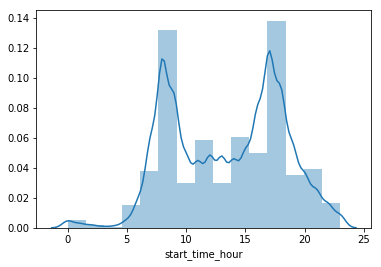

In [34]:
p2 = sb.distplot(df_clean.start_time_hour, bins=15)

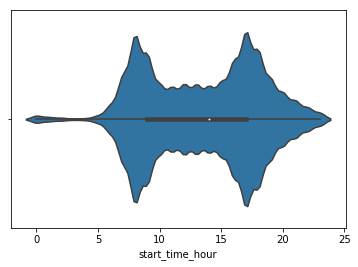

In [35]:
medianprops = {'color': 'red'}
sb.violinplot(data = df_clean, x = 'start_time_hour', color = bluesteel)

We have two periods that stand out: between 8 am and 9 am and from 5 pm to 6 pm, concentrating almost 20,000 users, perhaps demonstrating the commuting to and from work. In the intermediate period between these times, the utilization rate averages 7500 users.

In [31]:
df_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [32]:
df_clean.member_gender.value_counts('Customer')

Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64

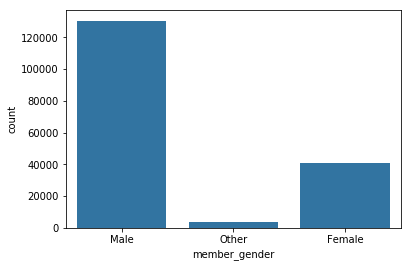

In [33]:
sb.countplot(data = df_clean, x = 'member_gender', color = bluesteel)

Analizing the member_age

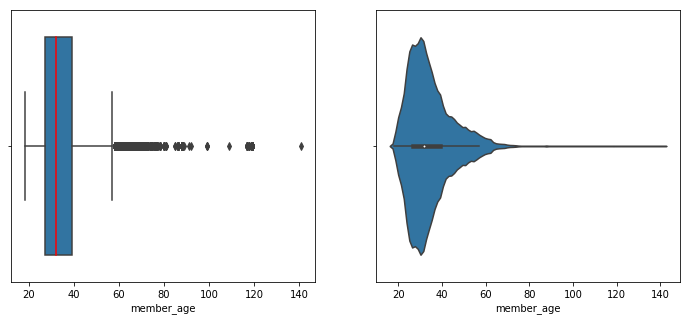

In [39]:
# Comparing member_age column with violinplot and boxplot
medianprops = {'color': 'red'}
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sb.boxplot(data = df_clean, x = 'member_age', color = bluesteel, ax=ax1, medianprops=medianprops)
sb.violinplot(data = df_clean, x = 'member_age', color = bluesteel, ax=ax2, medianprops=medianprops)


We have outliers at the top of the data.

In [35]:
df_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

Analyze using the boxplot showed outliers in the age group (140 years old). Based on the formula Q3 + (1.5*IQR) I will remove ages over 60.

In [36]:
# remove outliers
df_clean = df_clean[df_clean['member_age']<= 60]

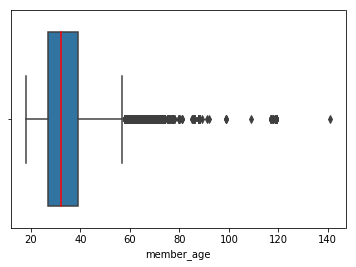

In [42]:
medianprops = {'color': 'red'}
sb.boxplot(data = df_clean, x = 'member_age', color = bluesteel, medianprops=medianprops)

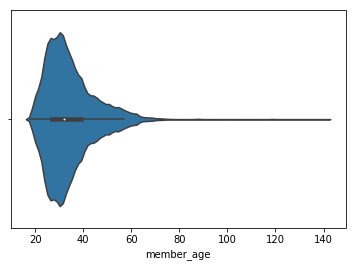

In [44]:
sb.violinplot(data = df_clean, x = 'member_age', color = bluesteel, medianprops=medianprops)

The age group with the most users is between 27 and 38 years old. From 38 years old to 60 years old we have a smooth decreasing curve.

Analyzing the percentage of users who are subscribers or customers

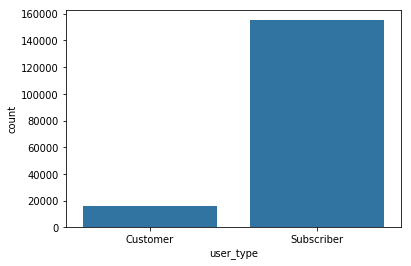

In [39]:
sb.countplot(data = df_clean, x = 'user_type', color = bluesteel)

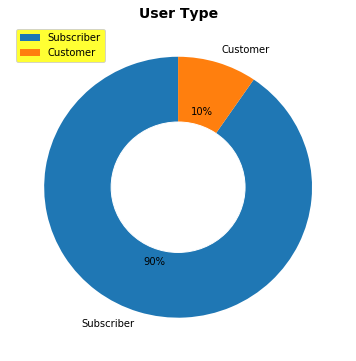

In [40]:
counts = df_clean['user_type'].value_counts()
labels = counts.index.tolist()
values = counts.values.tolist()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
circle = plt.Circle(xy=(0,0), radius=0.5, color='white')
ax.add_artist(circle)
plt.title('User Type', fontsize = 14, weight = "bold")
plt.legend(['Subscriber', 'Customer'], loc="upper left", facecolor='yellow')

plt.show()

We have a 90% subscriber rate.

In [41]:
df_clean.user_type.value_counts('Customer')

Subscriber    0.904493
Customer      0.095507
Name: user_type, dtype: float64

Checking the percentage of bike share for all trip

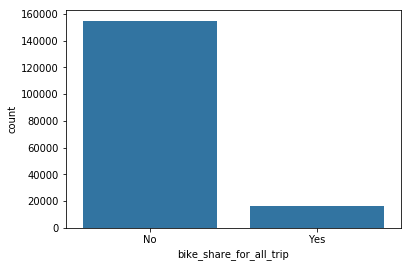

In [42]:
sb.countplot(data = df_clean, x = 'bike_share_for_all_trip', color = bluesteel)

In [43]:
df_clean.bike_share_for_all_trip.value_counts('Yes')

No     0.90258
Yes    0.09742
Name: bike_share_for_all_trip, dtype: float64

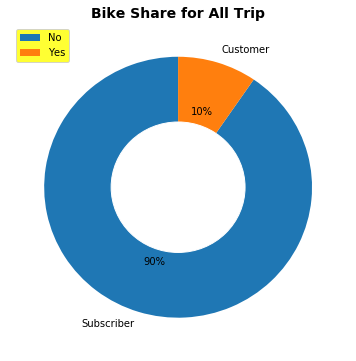

In [44]:
counts = df_clean['user_type'].value_counts()
labels = counts.index.tolist()
values = counts.values.tolist()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
circle = plt.Circle(xy=(0,0), radius=0.5, color='white')
ax.add_artist(circle)
plt.title('Bike Share for All Trip', fontsize = 14, weight = "bold")
plt.legend(['No', 'Yes'], loc="upper left", facecolor='yellow')
plt.show()

We have a percentage of 10% of customer bike use for the entire trip.

## Bivariate Exploration

To start, I want to look at the pairwise correlations present between features in the data.

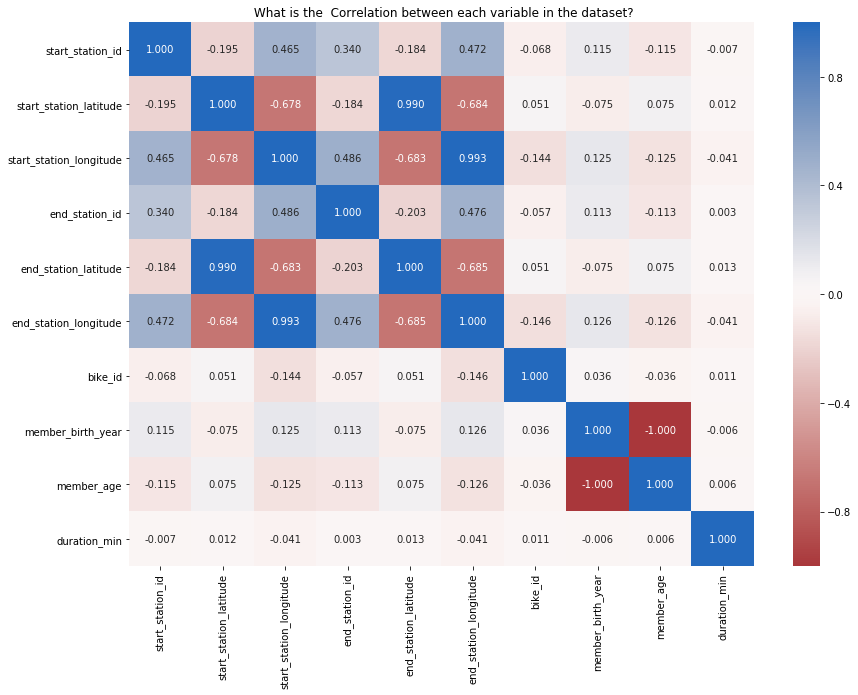

In [46]:
some_numeric_vars = ['start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_min']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'member_gender', 'user_type']

plt.figure(figsize = (14,10))
sb.heatmap(df_clean[some_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)

plt.title(" What is the  Correlation between each variable in the dataset?")
plt.show()

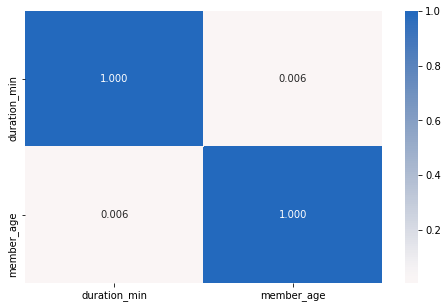

In [53]:
# correlation between numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There are indications of correlation between start_id/end_id, start_station_latitude/start_station_longitude, end_station_latitude/end_station_longitude.

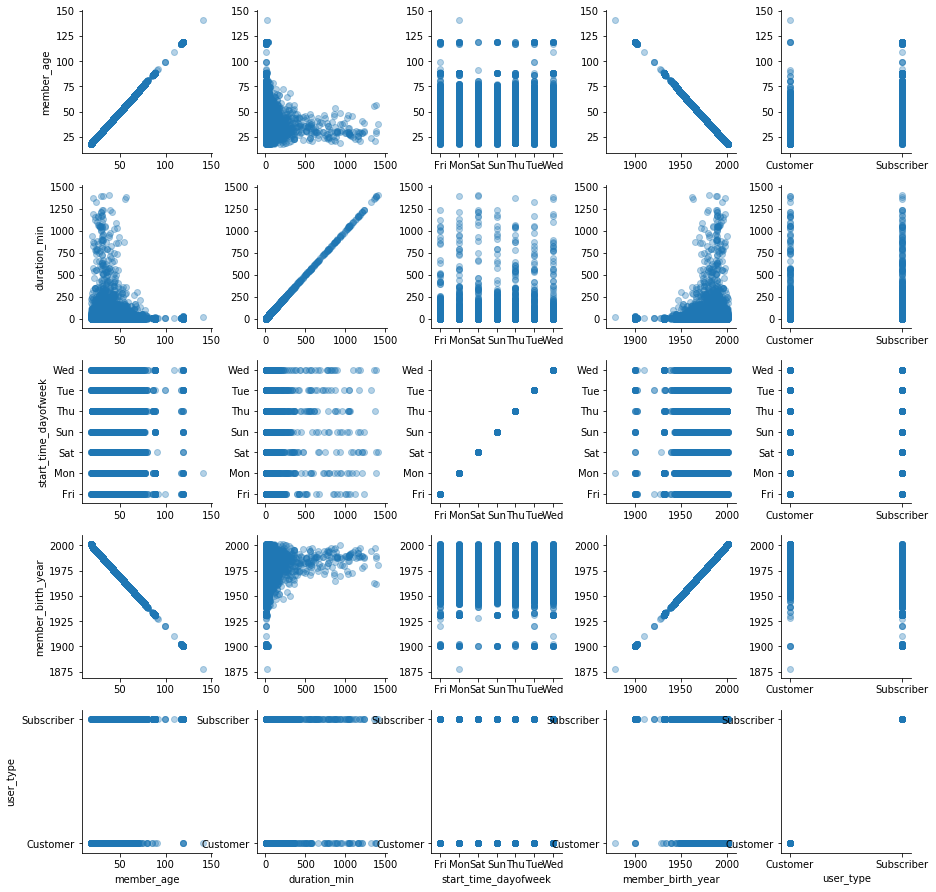

In [54]:
# Plot Matrix, larger sample so that are clearer

df_stat = ['member_age', 'duration_min','start_time_dayofweek', 'member_birth_year', 'user_type']
g = sb.PairGrid(data = df_clean, vars = df_stat) ;
g.map(plt.scatter, alpha = 1/3);

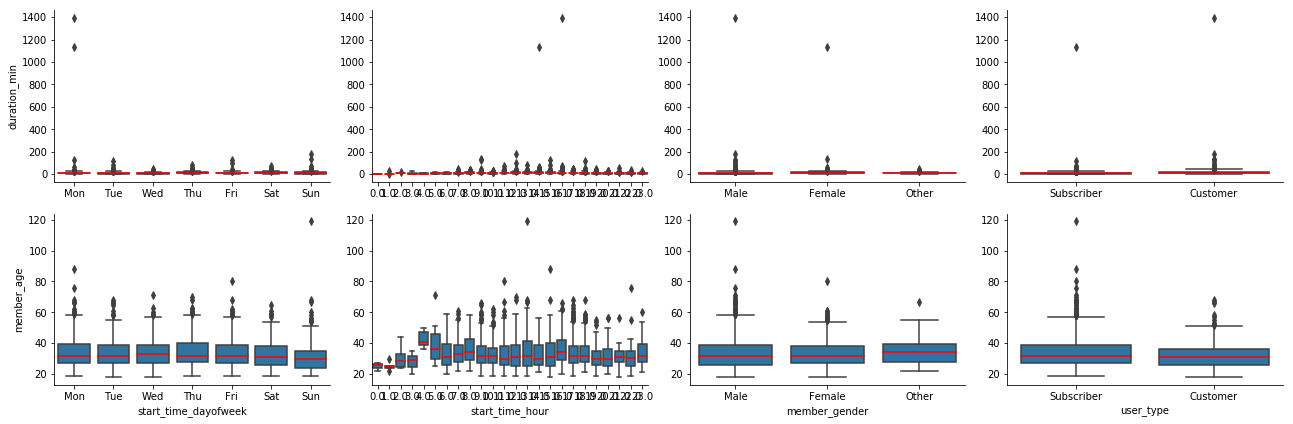

In [55]:
# plot the matrix of numerical features against the categorical features.
# can use a larger sample as there are less graphs and they are simpler in nature.
samples = np.random.choice(df_clean.shape[0], 2000, replace = False);
samp = df_clean.loc[samples, :];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color, medianprops = medianprops);

plt.figure(figsize = [15, 15]);
g = sb.PairGrid(data = samp, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars, size = 3, aspect = 1.5);
g.map(boxgrid);

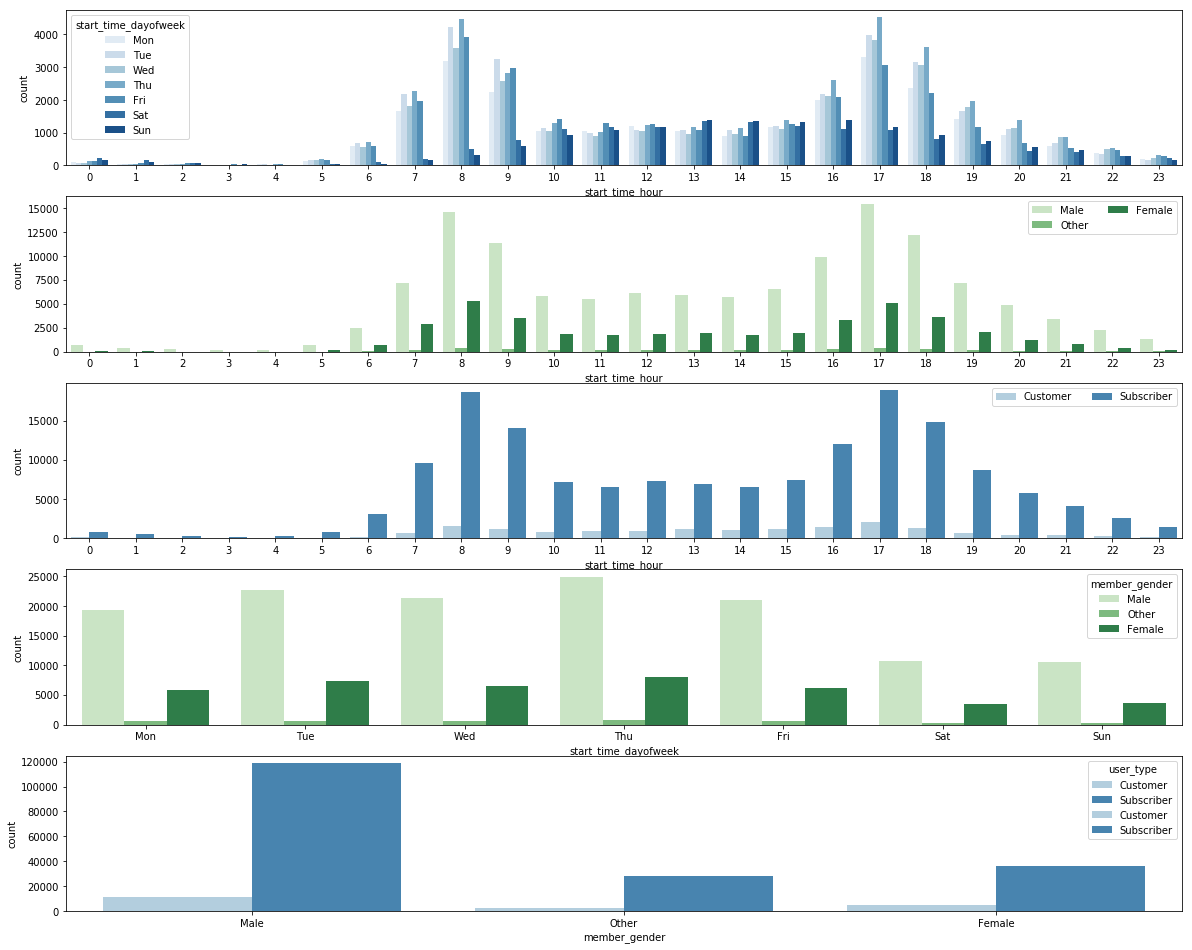

In [57]:
plt.figure(figsize = [20, 20]);

plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');

ax = plt.subplot(6, 1, 2);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Greens');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping

ax = plt.subplot(6, 1, 3);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Blues');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'Blues');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'Blues');

It appears that on Saturdays and Sundays in the period from 1pm to 4pm we have a large flow of users that exceeds the number of days of the week, it was also verified that the average age of users decreased on Saturdays and Sundays, perhaps due to the presence of parents and children taking advantage of the weekend to go out together.
As for gender, the distribution is parallel between male, female and others, that is, throughout the week the distribution is the same without major changes. The same goes for subscriber and customer.

Text(0.5,1,'Distribution between Age and Gender')

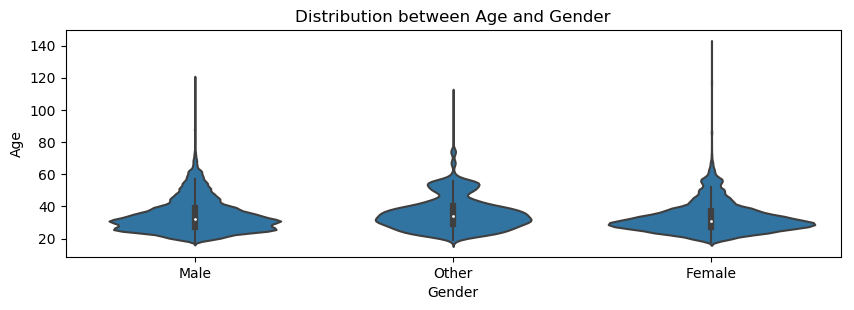

In [58]:
plt.figure(figsize = (10,3), dpi = 100)

bluesteel = sb.color_palette()[0]
sb.violinplot(data=df_clean,x = "member_gender", y = "member_age", color=bluesteel)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title("Distribution between Age and Gender")

Text(0.5,1,'Distribution between Age and Gender')

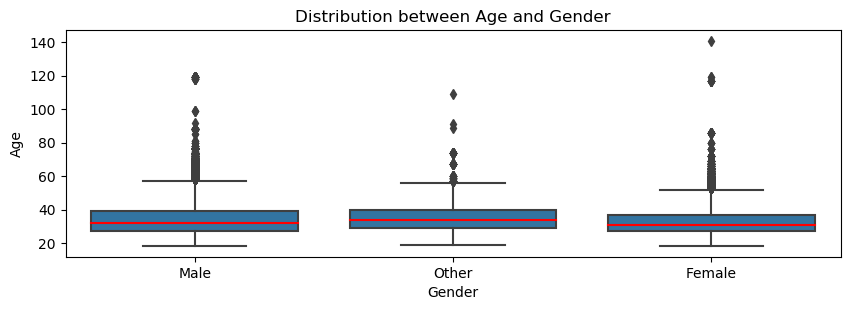

In [60]:
medianprops = {'color': 'red'}
plt.figure(figsize = (10,3), dpi = 100)
bluesteel = sb.color_palette()[0]
sb.boxplot(data=df_clean,x = "member_gender", y = "member_age", color=bluesteel, medianprops = medianprops)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title("Distribution between Age and Gender")

The correlation between age and gender presents some peculiarities: male presents a distribution that increases up to 25 years old and, in sequence, an arc that decreases at first and then increases again up to 30 years old, from this point onwards there is a smooth reduction up to 40 years old years of age and in the strongest sequence up to 60 years of age;
Females, on the other hand, grow progressively up to 27 years of age and then start a smooth decline up to 41 years of age, increasing in level up to 60 years of age with some variations between 50 and 55 years of age;
Others show a strong increase up to 30 and then decrease to 44, showing a growth again up to 55 and then decrease up to 60.years.

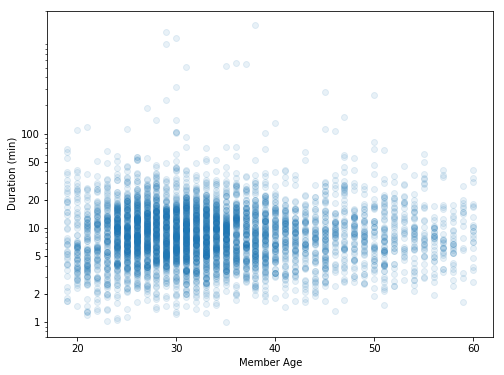

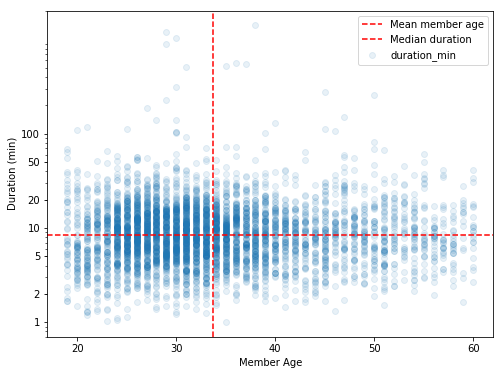

In [55]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
df_clean_samp = df_clean.loc[samples,:]

plt.figure(figsize = [8, 6]);
plt.scatter(data = df_clean_samp, x = 'member_age', y = 'duration_min', alpha = 1/10);
#plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

plt.figure(figsize = [8, 6])
plt.scatter(data = df_clean_samp, x = 'member_age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Member Age')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
plt.ylabel('Duration (min)')

# Add vertical line for average member_age
plt.axvline(df_clean_samp['member_age'].mean(), color='red', linestyle='--', label='Mean member age')

# # Add horizontal line to the median of duration_min
plt.axhline(df_clean_samp['duration_min'].median(), color='red', linestyle='--', label='Median duration')

plt.legend()

The correlation between age and duration presented by the graph shows us an accumulation of data between 3 to 21 minutes of trip and between users who are between 21 and 39 years old.

In [56]:
# Create a logarithm of duration

def log_duration(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
df_clean['log_duration_min'] = df_clean['duration_min'].apply(log_duration)

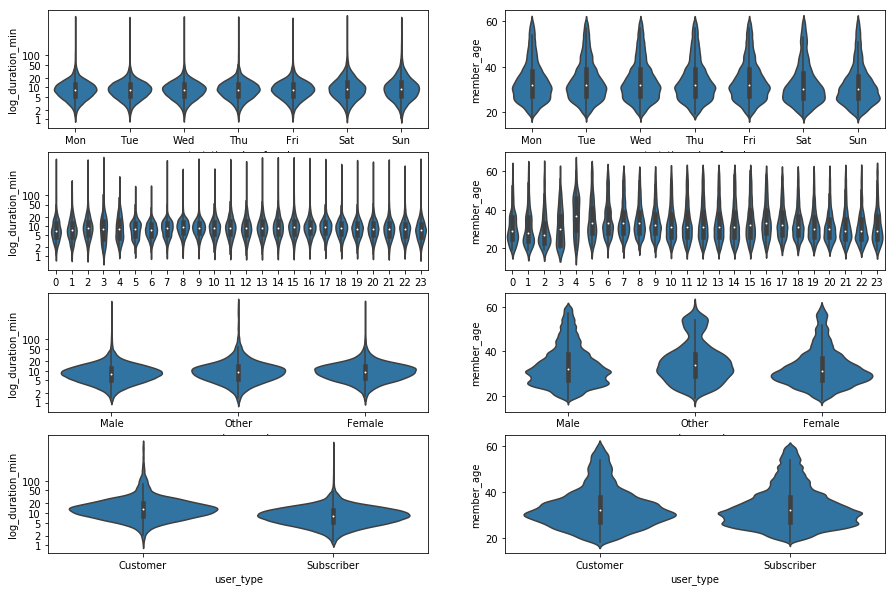

In [57]:
# Categorical variables against duration_min and member_age 

fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df_clean, x = var, y = 'log_duration_min', ax = ax[i,0], color = bluesteel);
    ax[i,0].set_yticks(log_duration(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.violinplot(data = df_clean, x = var, y = 'member_age', ax = ax[i,1], color = bluesteel);

Categorical variables versus duration_min show us the following:
duration_min has an average close to 9 minutes of bike use;
between 25 and 30 years old users have between monday and friday, saturdays and sundays the average age of users decreases to something between 20 and 25 years old;

Travel time is longer among customers (12 to 14 minutes) than among subscribers (8 to 10 minutes), since the age average is very similar between these two categories.

## Multivariate Exploration



Create heatmaps to analyze the variables, member_age, start_time_dayofweek, member_age and duration_min

In [95]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df_clean['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_duration(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

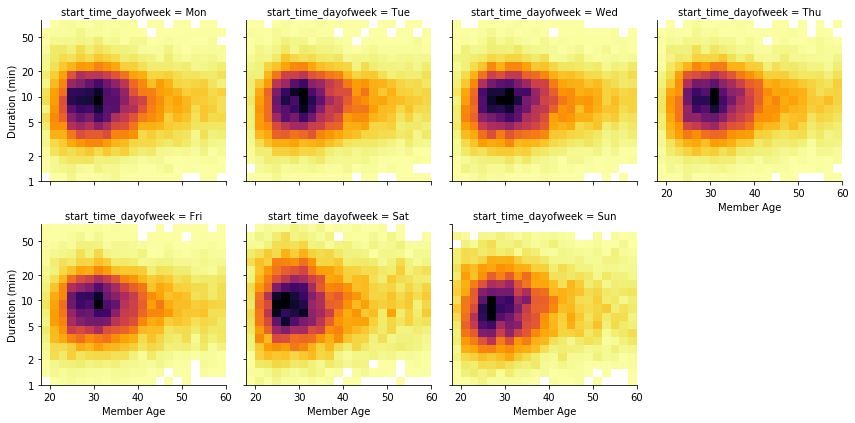

In [102]:
# create faceted heat maps on start_time_dayofweek/member_age/duration_min
g = sb.FacetGrid(data = df_clean, col = 'start_time_dayofweek', col_wrap = 4, size = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');


It is possible to verify that we have over the working days (Monday - Friday) users with an average age in the range of 28 to 30, with an average of 9 to 10 minutes of travel, on Saturdays and Sundays the average travel increases and drops the average age.

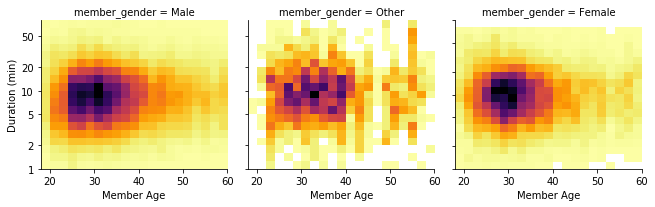

In [110]:
# create faceted heat maps on member_gender/member_age/duration min
g = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 4, size = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

When the gender is confirmed, the majority of males in terms of age range are very similar among males/females and a little dispersed among others.

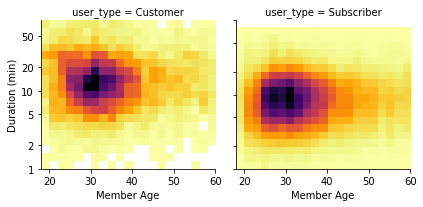

In [105]:
# create faceted heat maps on user_type/member_age/duration min
g = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2, size = 3, 
    xlim = [18, df_clean['member_age'].max()+2])
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

A higher average use of the bike was verified among customers in relation to subscribers, in terms of age, a higher age was also observed among customers.

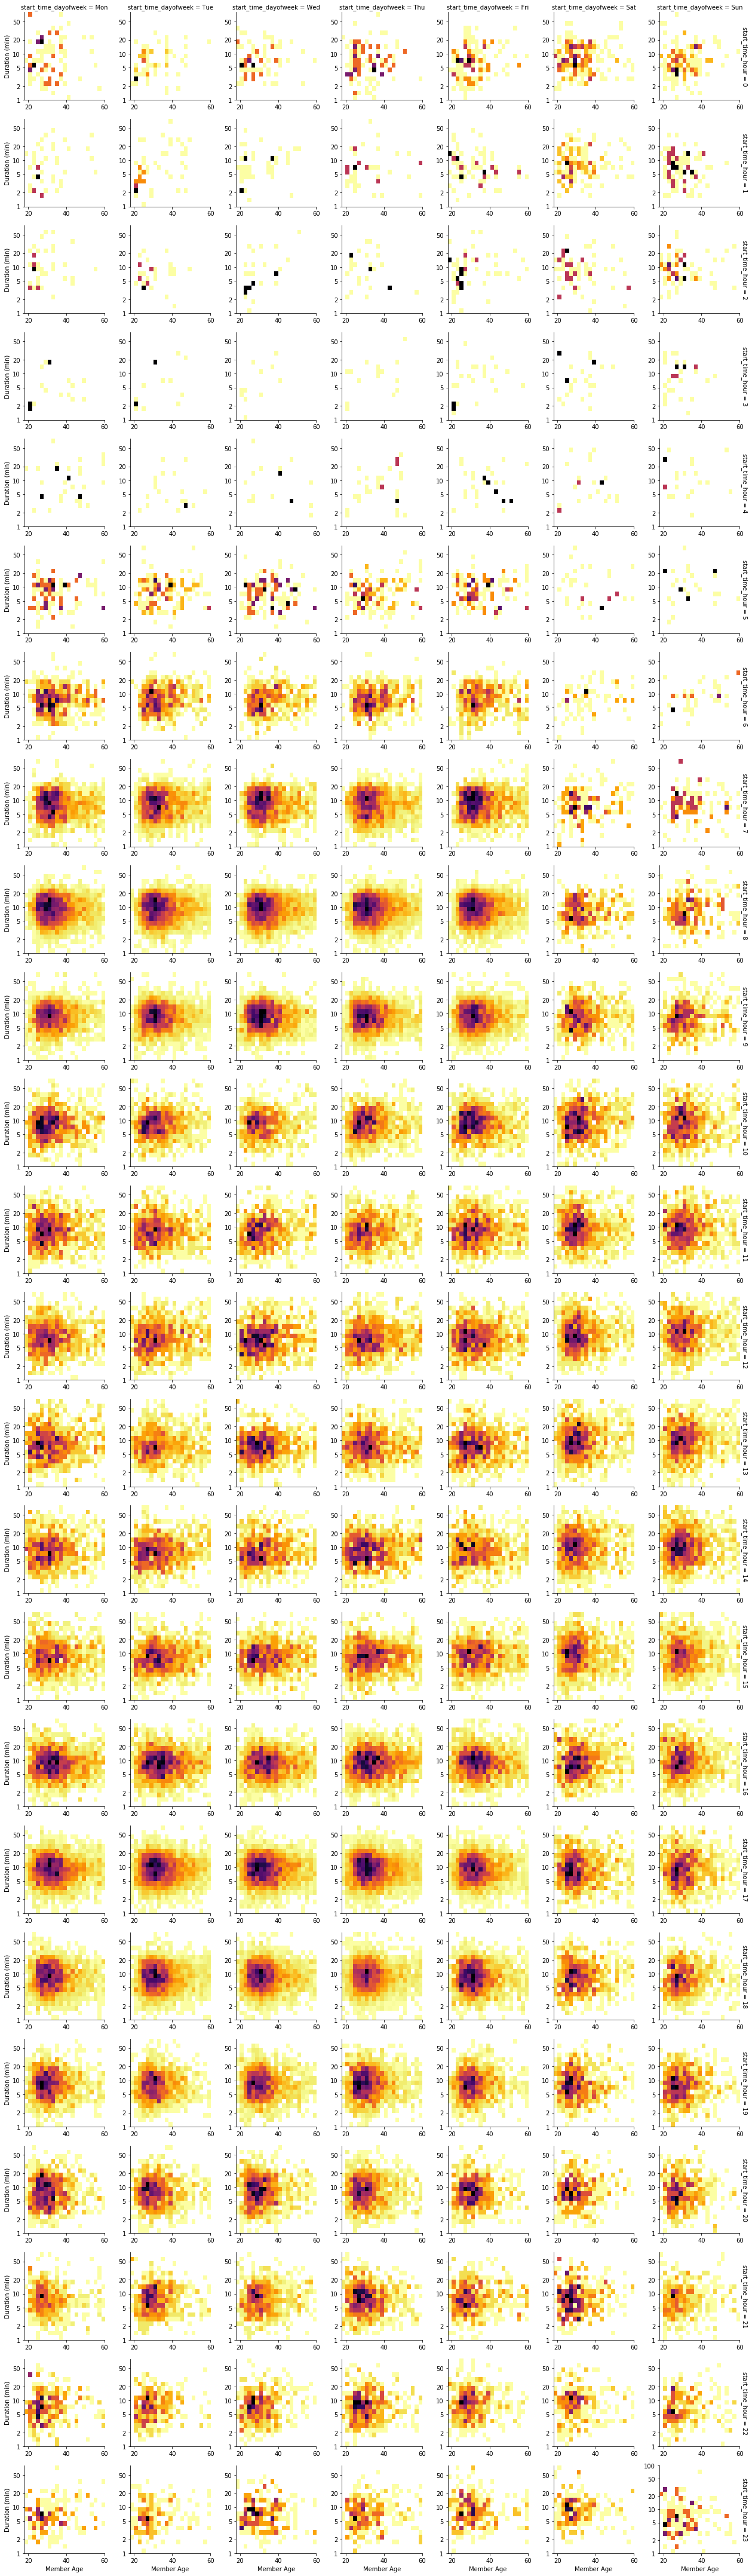

In [158]:
# create faceted heat maps on start_time_dayofweek/start_time_hour/member_age
g = sb.FacetGrid(data = df_clean, col = 'start_time_dayofweek', row = 'start_time_hour', size = 2.5, margin_titles = True);  
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

On Saturdays and Sundays we have users using the bikes at dawn (0, 1, 2 am); likewise the movement starts around 7 am on weekends. During the week (Monday - Friday) we have strong movement in the morning between 7 and 9 am, then the movement decreases and grows again between 11 and 13, falling again, to grow again between 5 and 6 pm going to 0:00: 00 with users using the bikes.

In [121]:
# Create a funcion to plot relation between variables side by side

def plot_duration_by_age(df, hue, title):
    age_below30 = df_clean[df_clean['member_age'] < 30]
    age_above30 = df_clean[df_clean['member_age'] >= 30]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
   

    hue_order = sorted(df[hue].unique())
    sb.pointplot(data=age_below30, x='start_time_hour', y='duration_min', hue=hue,
               palette='Blues', linestyles='', dodge=0.6, ci=None, scale=1.5, errwidth=0.7,
               ax=ax1, hue_order=hue_order)

    ax1.axhline(y=age_below30['duration_min'].median(), color='green', linestyle='--', label='Median')
    ax1.axhline(y=age_below30['duration_min'].mean(), color='red', linestyle='--', label='Mean')
    ax1.set_xlabel('Start Time Hour')
    ax1.set_ylabel('Mean Duration (min)')
    ax1.set_yscale('log')
    ax1.set_yticks([1, 2, 5, 10, 20, 50, 100])
    ax1.set_yticklabels([1, 2, 5, 10, 20, 50, 100])
    ax1.legend(title='Day of Week')
    ax1.set_title('Durations of trip for bikers YOUNGER than 30 years old - day of week {}'.format(title))
    ax1.yaxis.grid(False)
    ax1.xaxis.grid(False)

    hue_order = sorted(df[hue].unique())
    sb.pointplot(data=age_above30, x='start_time_hour', y='duration_min', hue=hue,
               palette='Blues', linestyles='', dodge=0.6, ci=None, scale=1.5, errwidth=0.7,
               ax=ax2, hue_order=hue_order)

    ax2.axhline(y=age_above30['duration_min'].median(), color='green', linestyle='--', label='Median')
    ax2.axhline(y=age_above30['duration_min'].mean(), color='red', linestyle='--', label='Mean')
    ax2.set_xlabel('Start Time Hour')
    ax2.set_ylabel('Mean Duration (min)')
    ax2.set_yscale('log')
    ax2.set_yticks([1, 2, 5, 10, 20, 50, 100])
    ax2.set_yticklabels([1, 2, 5, 10, 20, 50, 100])
    ax2.legend(title='Day of Week')
    ax2.set_title('Durations of trip for bikers OLDER than 30 years old - day of week {}'.format(title))
    ax2.yaxis.grid(False)
    ax2.xaxis.grid(False)

    plt.show()

Analyzing the relationship between member age (below and above 30 years of age) with day of week, member_gender and user_type.

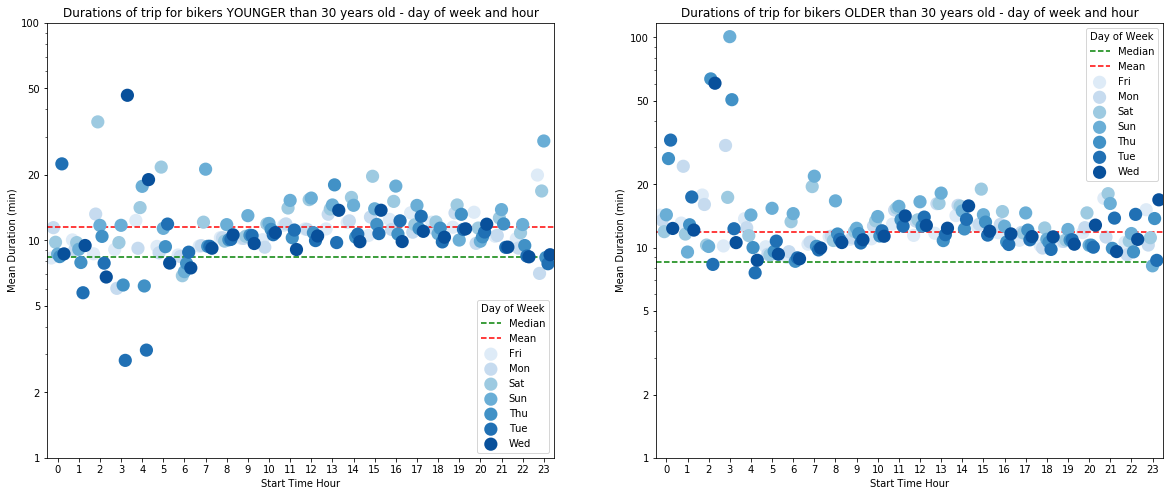

In [122]:
plot_duration_by_age(df_clean, 'start_time_dayofweek', 'and hour')

The distribution between youngers and olders seems to remain the same throughout the week, we have some outliers among younger people in the early hours of the day (both above and below) and outliers above among older ones.

Analyzing the relationship between member gender (below and above 30 years of age) with day of week, member_gender and user_type.

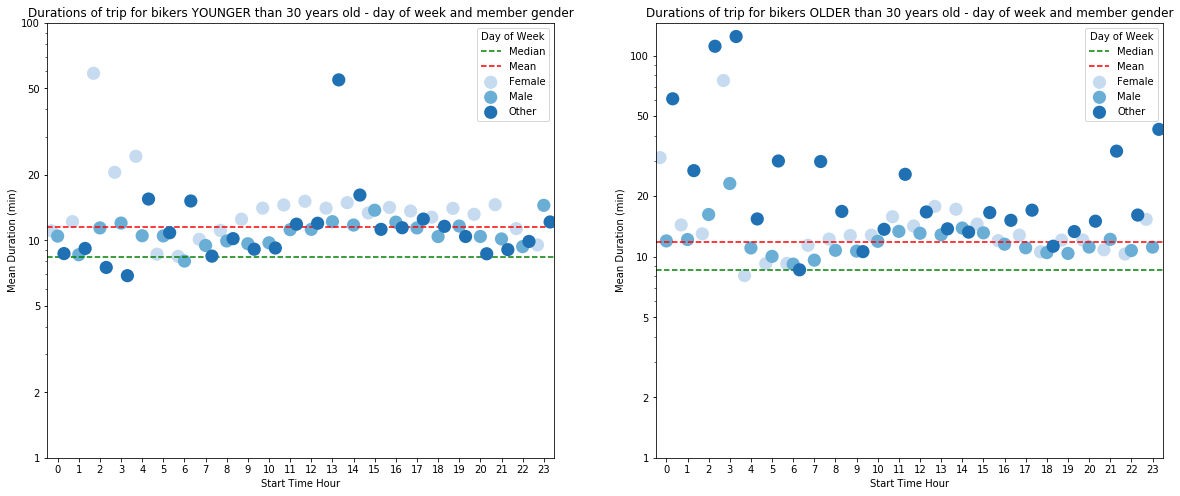

In [123]:
plot_duration_by_age(df_clean, 'member_gender', 'and member gender')

Similar relationship between the variables, it was noticed a longer time of use of the bikes by the females, it is also possible to notice a small period in the morning that the movement decreases (between 9 and 10 hours) in general. Usage average in the range of 8:30 seconds. Checked the existence of outliers among others, with no possibility of understanding the reason.

Analyzing the relationship between user type (below and above 30 years of age) with day of week, member_gender and user_type.

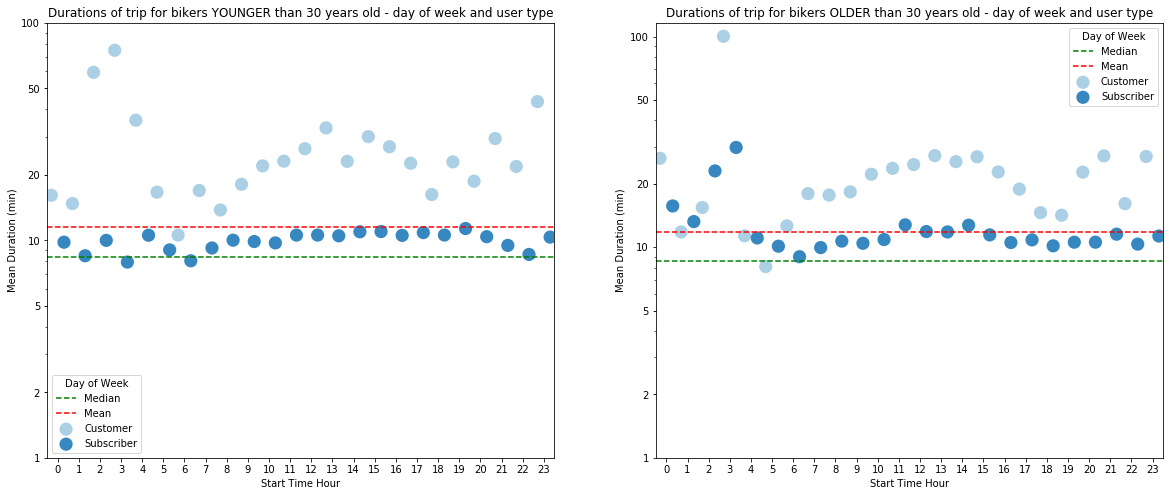

In [124]:
plot_duration_by_age(df_clean, 'user_type', 'and user type')

There was equality between the distributions with greater use of bikes by customers in both (younger/older), some outliers among subscribers in the early hours of the day (subscriber). Uptime is also higher among customers of both ages.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Summary:
- Thursdays have the highest number of users, followed by Tuesdays and Wednesdays.
- Commuting times are popular, with high utilization rates between 8-9 am and 5-6 pm on weekdays.
- Users aged between 27 and 38 years old are the most prevalent group.
- 10% of bike use is for the entire trip, and 90% of users are subscribers.
- Saturdays and Sundays see an influx of users in the afternoon, with a lower average age than on weekdays.
- Duration_min has an average close to 9 minutes, with longer trips among customers than subscribers.
- There is a correlation between start_id/end_id, start_station_latitude/start_station_longitude, and end_station_latitude/end_station_longitude.
- Age and gender have some peculiarities, with different age distributions for males and females. 

### Were there any interesting or surprising interactions between features?

Interactions between features:
- Age and gender have some significant differences in terms of usage patterns.
- The time of day and day of the week strongly affect bike usage, with different peaks and troughs across different periods.
- The correlation between start and end points, as well as the latitude and longitude, suggests that some stations are more popular than others.


## Conclusions
The analysis shows that bike sharing is particularly popular during commuting times on weekdays, with a high percentage of subscribers using the service. Saturdays and Sundays see an influx of users in the afternoons, potentially due to family outings. There are also some age and gender differences in usage patterns. Further analysis could explore the relationships between these features in more depth.